# Example 01: Set-up and Quick-Focus (Sequential)

In this example, skZemax API is used to:
- Build and configure a new Zemax lens file.
- Insert two surfaces to form a focusing lens
- Optimize the lens to focus with a custom F-number.

In this perspiration:
- The lens is 50 mm behind the stop (although this is arbitrary and is free to be changed).
- The lens is made from N-BK7.
- The front surface of the lens has a radius of 100 mm.
- The lens is 10 mm thick.
- The F-Number of the lens is 10.

This example is done in sequential mode (using the lens data editor - the `LDE`), but the general idea also applies to non-sequential lens files (using the non-sequential component editor - the `NCE`). 
Only specific function calls and settings are different. Further use of sequential and non-sequential modes will be shown more in following examples.

## Concise example code

We will go through this example in detail in below - as it instructs how the basic implementation of skZemax can be used to build and modify a lens system file.

However, for convenient reference the complete (and concise) code to execute this example is provided immediately here.

In [1]:
from __future__ import annotations

import os

from skZemax.skZemaxClass import skZemaxClass

skZemax = skZemaxClass()
# Make and configure the lens file
skZemax.Utilities_MakeNewZemaxFile(
    skZemax.Utilities_skZemaxExampleDir() + os.sep + r"e01_new_file_and_quickfocus.zmx"
)
skZemax.System_SetApertureProperty(apertureProperty="ApertureValue", apertureValue=40.0)
skZemax.Fields_AddField(field_x=0, field_y=5.0, field_weight=1.0)
skZemax.Wavelength_SelectWavelengthPreset("d_0p587")
# Build the lens
skZemax.LDE_InsertNewSurface(2)
skZemax.LDE_InsertNewSurface(2)
system_stop_object = skZemax.LDE_GetSurface(1)
lens_front_object = skZemax.LDE_GetSurface(2)
lens_back_object = skZemax.LDE_GetSurface(3)
system_stop_properties = skZemax.LDE_GetAllColumnDataOfSurface(system_stop_object)
lens_front_properties = skZemax.LDE_GetAllColumnDataOfSurface(lens_front_object)
lens_back_properties = skZemax.LDE_GetAllColumnDataOfSurface(lens_back_object)
system_stop_properties["Comment"] = "This is free to move."
system_stop_properties["Thickness"] = 50.0
lens_front_properties["Comment"] = "Front of lens"
lens_front_properties["Radius"] = 100.0
lens_front_properties["Thickness"] = 10.0
lens_front_properties["Material"] = "N-BK7"
lens_back_properties["Comment"] = "Back of lens"
# Setting this to None will not adjust the value.
# In this case, keeping the size floating to prevent vignetting.
lens_front_properties["Clear Semi-Dia"] = None
lens_front_properties["Mech Semi-Dia"] = None
lens_back_properties["Clear Semi-Dia"] = None
lens_back_properties["Mech Semi-Dia"] = None
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(
    system_stop_object, system_stop_properties
)
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(lens_front_object, lens_front_properties)
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(lens_back_object, lens_back_properties)
# Solve for the F-Number
skZemax.Solver_LDESurfaceProperty_ForValue(
    in_surface=lens_back_object,
    property="radius",
    solve_type="fnumber",
    params={"fnumber": 10.0},
)
skZemax.Solver_QuickFocus_SpotSize()
# Save and view
skZemax.Utilities_SaveZemaxFile()
cross_section_image_file_name = (
    skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e01_new_file_and_quickfocus_Shaded.png"
)
skZemax.Visualization_SEQ_ShadedModel(
    saved_image_location=cross_section_image_file_name
)
# Close
del skZemax
skZemax = None

MakeNewZemaxFile ::  New Zemax file [E:\_OfficerRepositories\ZemaxRepos\skZemax\docs\source\Examples\e01_new_file_and_quickfocus.zmx] created.
SaveZemaxFile :: Saving Current Zemax File.


#### View of the lens system

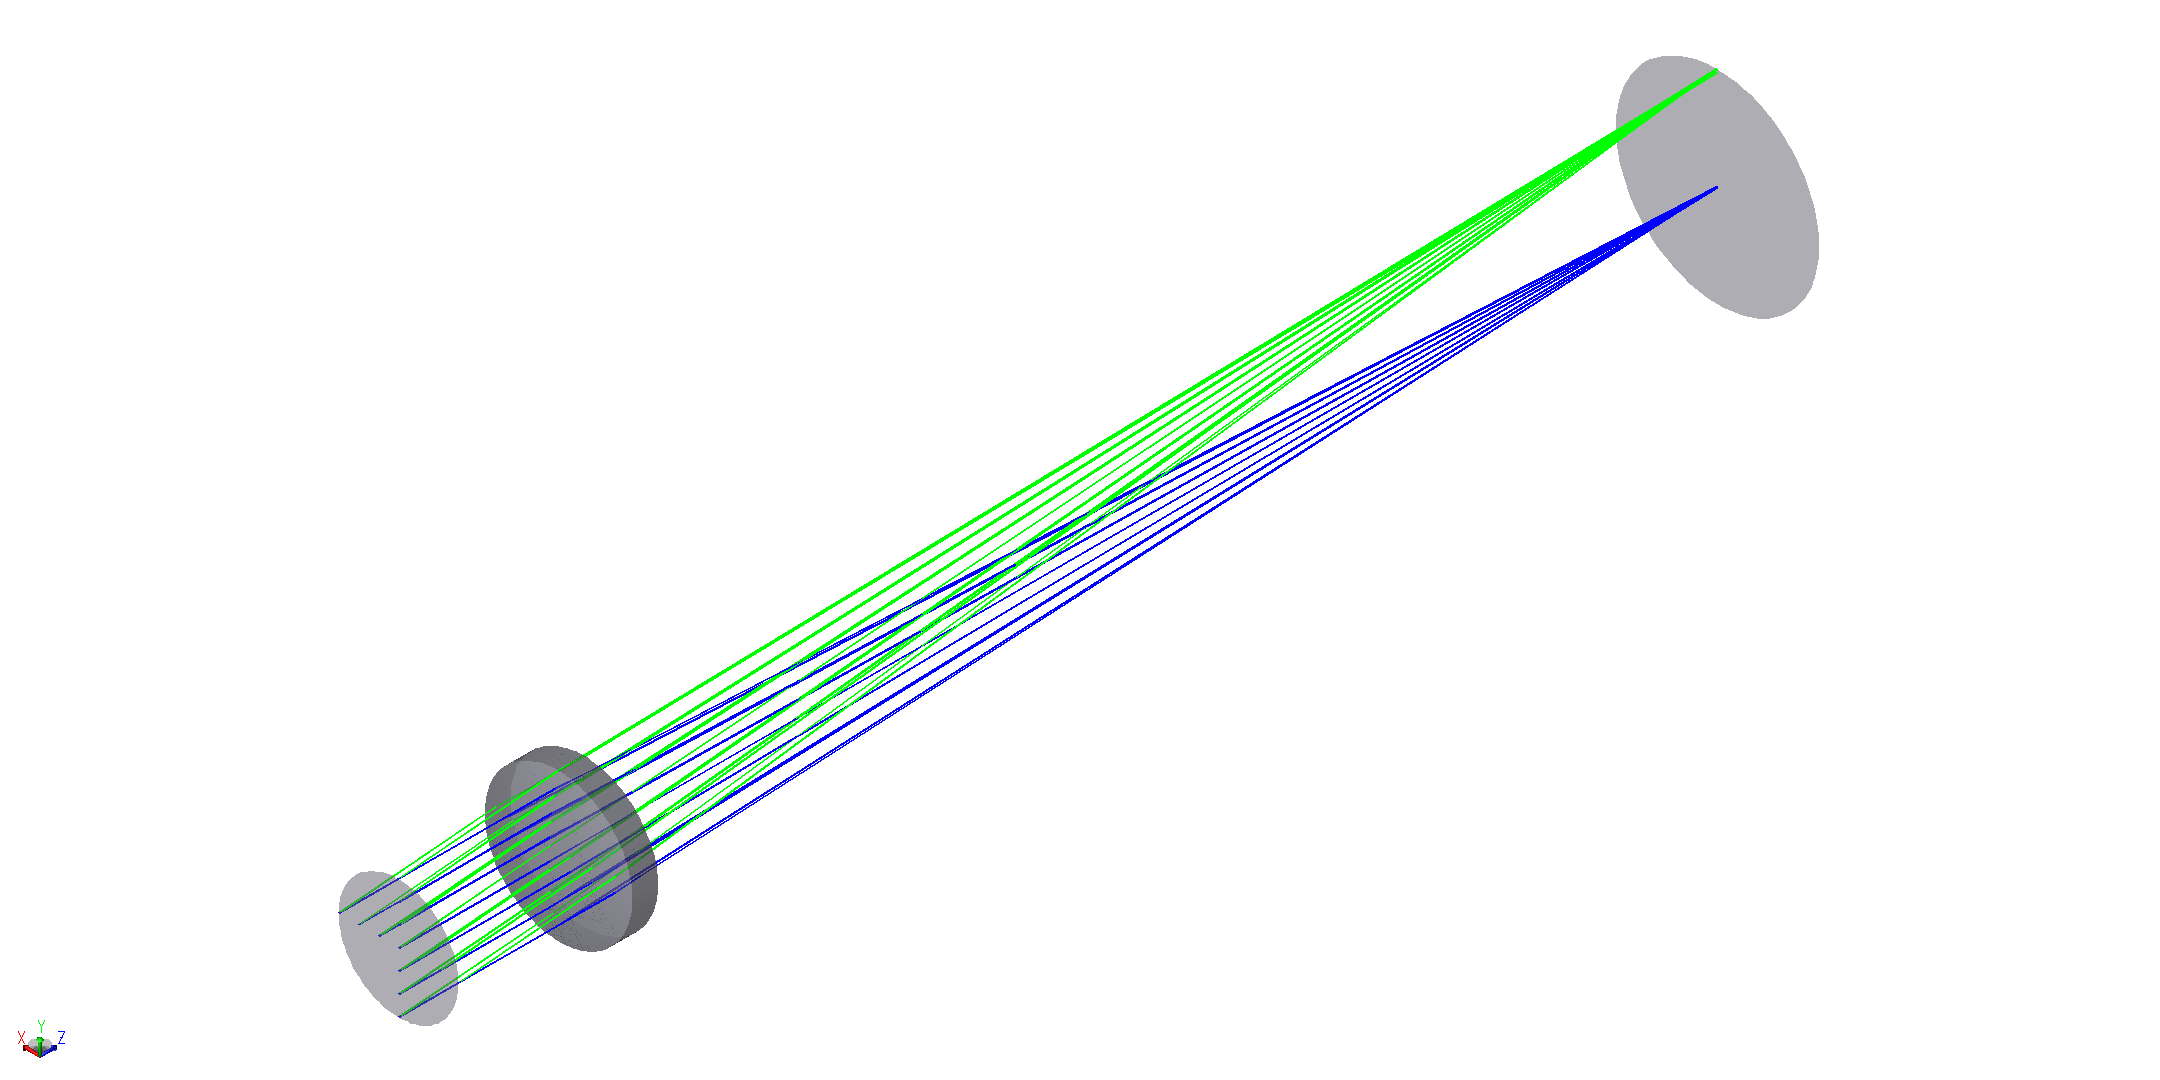

In [2]:
from IPython.display import Image

Image(filename=cross_section_image_file_name, width=800)

## Detailed example code

Begin by importing the skZemaxClass, and any supporting packages. Then instantiate the skZemaxClass object.

In [3]:
import os

from skZemax.skZemaxClass import skZemaxClass

skZemax = skZemaxClass()

#### Making a New file

We will make a brand new Zemax lens file and call it `e01_new_file_and_quickfocus.zmx`.

- The `skZemax.Utilities_MakeNewZemaxFile()` function, as the name suggests, will actually make the file. 
    - Within the catagorizing naming scheme of the skZemax package, this is a `Utilities` function.
- `skZemax.Utilities_skZemaxExampleDir()` is another helpful `Utilities` function which provides your system's path to the default example files kept by skZemax.

In [4]:
skZemax.Utilities_MakeNewZemaxFile(
    skZemax.Utilities_skZemaxExampleDir() + os.sep + r"e01_new_file_and_quickfocus.zmx"
)

MakeNewZemaxFile ::  New Zemax file [E:\_OfficerRepositories\ZemaxRepos\skZemax\docs\source\Examples\e01_new_file_and_quickfocus.zmx] created.


#### Adding a material catalog

We will now specify `SCHOTT` in the material catalog. In newer versions of Zemax, `SCHOTT` is included by default, but this still makes a good example.

- `skZemax.System_GetNamesOfAllMaterialCatalogs(print_to_console=True)` is a function which will return a python list of catalogs Zemax is aware of.
    - Here we are printing it to console as well. Your list may look different depending on version or if you have specified custom catalogs already.

As you may notice in the list below, `SCHOTT` isn't there, again that is because in this version of Zemax that old catalog is built in. 
However, there is a `SCHOTT_IRG` catalog. We will still try to add the `SCHOTT` and you will find this will actually add the `SCHOTT_IRG` catalog instead.

- For robustness, skZemax does its best to match the Zemax names wit your string inputs (using a `str1.lower() in str2.lower()` style comparison). In this case `SCHOTT_IRG` was identified and added.
    - If more than one name in a Zemax list can match your input, skZemax will apply the first one in order of ascending length, and then alphabetical order.
        - Given this it is still good practice to be as precise as possible in your inputs.

In [5]:
skZemax.System_GetNamesOfAllMaterialCatalogs(print_to_console=False)
skZemax.System_AddMaterialCatalog("SCHOTT")

#### Setting the lens file system aperture.

We will now configure the lens system aperture properties. Specifically we will set the aperture size to 40 of the system units (mm by default).
- As with the catalog, skZemax also gives you a function to see some aperture settings, `skZemax.System_GetNamesOfAllApertureSettings()`, but we will forgo that here.


In [6]:
skZemax.System_SetApertureProperty(apertureProperty="ApertureValue", apertureValue=40.0)

#### Configuring system fields

A Zemax field specifies an angular input to the optical system. It is configured by an angle (in degrees) along the `X` and `Y` axis. 
In addition one can give a weight to the field with respect to others so Zemax can optimize systems with this knowledge.

- The optical-axis is included by default when making a new lens file. So there is no need to add it in this case.
    - Using skZemax, one could include the default field with `skZemax.Fields_AddField(field_x=0, field_y=0.0, field_weight=1.0)`
- We will add a new field coming from +5 degrees into the system.

In [7]:
skZemax.Fields_AddField(field_x=0, field_y=5.0, field_weight=1.0)

#### Set system wavelengths using preset

The system also needs to be told what wavelengths to model. 
- Specifying your own custom wavelengths can be done in skZemax with `skZemax.Wavelength_AddWavelength(wavelength_micrometers, wavelength_weight)`.
- However, Zemax also has some wavelength presets. We will use the `d_0p587` here.
    - To see all named wavelength presets, use `skZemax.Wavelength_GetNamesOfAllPresets()`.

In [8]:
skZemax.Wavelength_SelectWavelengthPreset("d_0p587")

#### Building and configuring surfaces

##### Inserting a new surface

By default a new lens file will include three surfaces indexed by [#]:
- [0] OBJECT
- [1] STOP
- [2] IMAGE

To include a new surface, we can insert one using `skZemax.LDE_InsertNewSurface()`. 

Invoking this on surface `2`,

In [9]:
skZemax.LDE_InsertNewSurface(2)

will insert the new surface *before* the surface indexed at 2 making the lens system:
- [0] OBJECT
- [1] STOP
- [2] NEW SURFACE 1
- [3] IMAGE

#### Adjusting surface properties

To change properties of a surface in the lens system, one needs to acquire a surface object with,

In [10]:
new_surface_1 = skZemax.LDE_GetSurface(2)

It is possible to set properties of a surface directly, for instance,

In [11]:
new_surface_1.Comment = "This is your new surface, NEW SURFACE 1"

However, this method of adjusting surfaces properties is somewhat **unreliable** within the ZOS-API interface (especially for non-sequential objects). 

So, skZemax also gives an alternative way using python dictionaries:

In [12]:
new_surface_1_properties = skZemax.LDE_GetAllColumnDataOfSurface(2)
print(new_surface_1_properties)
new_surface_1_properties["Comment"] = "NEW SURFACE 1"
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(2, new_surface_1_properties)
print(skZemax.LDE_GetAllColumnDataOfSurface(2))

{'Comment': 'This is your new surface, NEW SU', 'Radius': 'Infinity', 'Thickness': '0.00000000000000000E+00', 'Material': '', 'Coating': '', 'Clear Semi-Dia': '2.00000000000000000E+01', 'Chip Zone': '0.00000000000000000E+00', 'Mech Semi-Dia': '2.00000000000000000E+01', 'Conic': '0.00000000000000000E+00', 'TCE x 1E-6': '0.00000000000000000E+00'}
{'Comment': 'NEW SURFACE 1', 'Radius': 'Infinity', 'Thickness': '0.00000000000000000E+00', 'Material': '', 'Coating': '', 'Clear Semi-Dia': '2.00000000000000000E+01', 'Chip Zone': '0.00000000000000000E+00', 'Mech Semi-Dia': '2.00000000000000000E+01', 'Conic': '0.00000000000000000E+00', 'TCE x 1E-6': '0.00000000000000000E+00'}


**Using the dictionaries are the recommended way of setting sequential surface, and non-sequential object, properties!**

##### skZemax object-index interfacing

Instead of always having to keep track of indices skZemax functions will generally also allow operation on objects directly. 
To insert another new surface we can use `skZemax.LDE_InsertNewSurface()` as before, but now giving `new_surface_1` as an input.

In [13]:
new_surface_2 = skZemax.LDE_InsertNewSurface(new_surface_1)

The system now looks like:
- [0] OBJECT
- [1] STOP
- [2] NEW SURFACE 2
- [3] NEW SURFACE 1
- [4] IMAGE

of course, the properties can be passing objects as too,

In [14]:
new_surface_2_properties = skZemax.LDE_GetAllColumnDataOfSurface(new_surface_2)
new_surface_2_properties["Comment"] = "NEW SURFACE 2"
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(2, new_surface_2_properties)
print(skZemax.LDE_GetAllColumnDataOfSurface(new_surface_2))

{'Comment': 'NEW SURFACE 2', 'Radius': 'Infinity', 'Thickness': '0.00000000000000000E+00', 'Material': '', 'Coating': '', 'Clear Semi-Dia': '2.00000000000000000E+01', 'Chip Zone': '0.00000000000000000E+00', 'Mech Semi-Dia': '2.00000000000000000E+01', 'Conic': '0.00000000000000000E+00', 'TCE x 1E-6': '0.00000000000000000E+00'}


#### Removing/deleting surfaces

Deleting surfaces is straight forward, and can be done on both indices and objects.

To delete the two new surfaces we just made,

In [15]:
skZemax.LDE_RemoveSurface(
    3
)  # This will remove "NEW SURFACE 1" which is currently at index 3.
skZemax.LDE_RemoveSurface(new_surface_2)  # This will remove "NEW SURFACE 2".

#### Building a lens

We will now build a focusing lens in-between the system stop and the image plane. 
Currently, the system is configured back to the default surfaces of:
- [0] OBJECT
- [1] STOP
- [2] IMAGE

First (re-)insert two surfaces (just like we did above) for the front and back surfaces of the focusing lens:


In [16]:
skZemax.LDE_InsertNewSurface(2)
skZemax.LDE_InsertNewSurface(2)
system_stop_object = skZemax.LDE_GetSurface(1)
lens_front_object = skZemax.LDE_GetSurface(2)
lens_back_object = skZemax.LDE_GetSurface(3)

Now we will put in some basic surface properties to define the lens.


In [17]:
system_stop_properties = skZemax.LDE_GetAllColumnDataOfSurface(system_stop_object)
lens_front_properties = skZemax.LDE_GetAllColumnDataOfSurface(lens_front_object)
lens_back_properties = skZemax.LDE_GetAllColumnDataOfSurface(lens_back_object)
system_stop_properties["Comment"] = "This is free to move."
system_stop_properties["Thickness"] = 50.0
lens_front_properties["Comment"] = "Front of lens"
lens_front_properties["Radius"] = 100.0
lens_front_properties["Thickness"] = 10.0
lens_front_properties["Material"] = "N-BK7"
lens_back_properties["Comment"] = "Back of lens"
# Setting this to None will not adjust the value. In this case, keeping the size floating to prevent vignetting.
lens_front_properties["Clear Semi-Dia"] = None
lens_front_properties["Mech Semi-Dia"] = None
lens_back_properties["Clear Semi-Dia"] = None
lens_back_properties["Mech Semi-Dia"] = None
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(
    system_stop_object, system_stop_properties
)
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(lens_front_object, lens_front_properties)
skZemax.LDE_SetAllColumnDataOfSurfaceFromDict(lens_back_object, lens_back_properties)

#### Solve for an F-number

In the above configuration we did not set any properties of the lens back surface. 
Let's configure Zemax to solve the radius of this surface for the desired F-number of 10 mm.

In [18]:
skZemax.Solver_LDESurfaceProperty_ForValue(
    in_surface=lens_back_object,
    property="radius",
    solve_type="fnumber",
    params={"fnumber": 10.0},
)

Note: to retrieve more options/settings for solves like this, see `skZemax.Solver_GetNamesOfAllSolveTypes()` and Zemax documentation.

Now we need to run a solver. We will use a quick focus to finish the system.

In [19]:
skZemax.Solver_QuickFocus_SpotSize()

#### Saving the lens file after changes

Now that the system has been built and configured we should save it again so the changes are not lost.
- Calling `skZemax.Utilities_SaveZemaxFile()` saves the file again (in this case as `e01_new_file_and_quickfocus.zmx`)
- Invoking `skZemax.Utilities_SaveZemaxFileAs(in_file_path)` will save the current system as a new file (specified by `in_file_path`)

In [20]:
skZemax.Utilities_SaveZemaxFile()

SaveZemaxFile :: Saving Current Zemax File.


#### Visualizing the lens system

Often it is very helpful to see what the lens system looks like. Zemax does this using 2D cross sections, or 3D wire or shaded view.
These can all be called within skZemax to make image files of the lens system:

In [21]:
skZemax.Visualization_SEQ_2DCrossSection(
    saved_image_location=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e01_new_file_and_quickfocus_2DCrossSection.png"
)
skZemax.Visualization_SEQ_3DViewer(
    saved_image_location=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e01_new_file_and_quickfocus_3DView.png"
)
skZemax.Visualization_SEQ_ShadedModel(
    saved_image_location=skZemax.Utilities_skZemaxExampleDir()
    + os.sep
    + r"e01_new_file_and_quickfocus_Shaded.png"
)

#### Closing the code

It is best practice to close the connection to the Zemax application (the server instance of OpticStudio). 
This can be done by invoking the `__del__()` function of the class - which is run by python when the object is deleted.
The Zemax application can be used on multiple different lens files as your custom code is run. 
So for maximum performance do not do this until you are done with Zemax.

In [22]:
del skZemax
skZemax = None